In [1]:
"""
실제 업무 또는 AI 경진 대회 참가 등의 상황에서는 
파일 형태의 데이터셋을 분석에 활용해야한다

이미지 데이터셋을 32장, 64장, 128장 등 배치(batch) 단위로 나눈다음
배치 한 개를 읽어와 딥러닝 모델에 주입하면 메모리 부담 없이 학습할 수 있다
전체 데이터셋을 전부 모델에 입력할 때까지 배치 단위로 읽어오고 주입하는 과정을 반복

이번에는 데이터셋을 배치 단위의 여러 부분으로 나누고 반복 객체(iterator)를 통해서 
각 배치를 한 개씩 모델에 입력하여 훈련하는 방법을 소개
이 과정을 손쉽게 처리할 수 있도록 텐서플로 케라스는 ImageDataGenerator 함수를 지원

"""

'\n실제 업무 또는 AI 경진 대회 참가 등의 상황에서는 \n파일 형태의 데이터셋을 분석에 활용해야한다\n\n이미지 데이터셋을 32장, 64장, 128장 등 배치(batch) 단위로 나눈다음\n배치 한 개를 읽어와 딥러닝 모델에 주입하면 메모리 부담 없이 학습할 수 있다\n전체 데이터셋을 전부 모델에 입력할 때까지 배치 단위로 읽어오고 주입하는 과정을 반복\n\n이번에는 데이터셋을 배치 단위의 여러 부분으로 나누고 반복 객체(iterator)를 통해서 \n각 배치를 한 개씩 모델에 입력하여 훈련하는 방법을 소개\n이 과정을 손쉽게 처리할 수 있도록 텐서플로 케라스는 ImageDataGenerator 함수를 지원\n\n'

In [2]:
"""
# 데이터셋 다운로드
"""

'\n# 데이터셋 다운로드\n'

In [3]:
"""
라이브러리 불러오기 
"""
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pylab as plt

In [4]:
"""
파일 연결
"""
# 훈련 셋, 검증 셋 저장 위치 지정ㅇ
train_dir = "dataset/cat_and_dog/training_set/training_set"
valid_dir = "dataset/cat_and_dog/test_set/test_set"

print(train_dir)
print(valid_dir)

dataset/cat_and_dog/training_set/training_set
dataset/cat_and_dog/test_set/test_set


In [5]:
"""
#모델 학습

케라스 ImageDataGenerator 클래스 함수를 실행하고 rescale 옵션을 지정해 이미지 각
픽셀의 값을 0~1 범위로 정규화 한다. 생성된 제너레이터 객체를 image_gen 변수에 할당한다
"""

#이미지 데이터 제너레이터 정의(Augmentation 미적용)
image_gen = ImageDataGenerator(rescale=(1/255.0))
image_gen

In [6]:
"""
Flow_from_diretory 함수
이미지 제너레이터 객체에 flow_from_diretory 함수를 적용하면, 지정한 폴더에서 이미지를
가져와 반복 이터레이션이 가능하도록 데이터셋을 처리한다

훈련 셋이 저장되어 있는 train_dir,
batch_size 속성에는 배치를 구성하는 이미지 개수(batch_size)32, 
target_size 속성에는 저장될 이미지의(세로, 가로) 픽셀 사이즈, 
classes 속성에는 클래스 레이블
(실제 이미지가 들어 있는 하위 폴더 이름인 cats, dogs), 
class_mode 에는 이진 분류 문제를 나타내는 binary 모드, 랜덤 시드 값을 지정한다
"""
#flow_from_diretory 함수로 폴더에서 이미지를 가져와 제너레이터 객체로 정리
train_gen = image_gen.flow_from_directory(train_dir,
                                         batch_size=32,
                                         target_size = (224, 224),
                                         classes = ['cats', 'dogs'],
                                         class_mode = "binary",
                                         seed=2020)

valid_gen = image_gen.flow_from_directory(valid_dir,
                                         batch_size=32,
                                         target_size = (224, 224),
                                         classes = ['cats', 'dogs'],
                                         class_mode = "binary",
                                         seed=2020)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


C:\Users\its_me1\AppData\Local\Temp/ipykernel_3316/783844139.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title(class_labels[labels[i].astype(np.int)]),


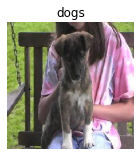

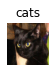

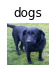

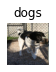

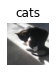

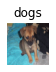

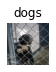

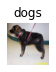

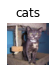

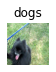

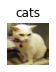

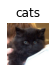

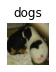

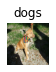

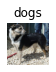

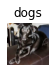

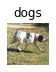

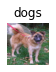

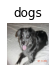

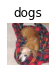

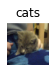

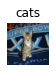

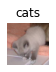

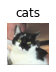

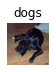

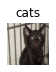

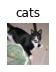

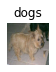

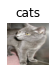

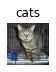

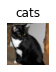

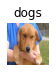

In [7]:
"""
1개의 배치를 선택해서 배치 안에 들어 있는 32개의 이미지를 정답 클래스 레이블과 
함께 출력
"""
# 샘플 이미지 출력
class_labels = ["cats", "dogs"]
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize = (16, 8))
for i in range(32):
    
    ax = (plt.subplot(4, 8, i +1),
          plt.imshow(images[i]),
          plt.title(class_labels[labels[i].astype(np.int)]),
          plt.axis("off"))
    
    plt.tight_layout()
    plt.show()

In [8]:
"""
# 모델 훈련
이진 분류 모델을 정의한다 
배치 정규화 - 합성곱 - 풀링 으로 구성된 단위 블럭을 3개 반복하여 
이미지로부터 다양한 피처(특징)를 추출하고 
최종 분류기로는 Dense 레이어를 사용한다
최종 출력 레이어는 노드 1개를 갖고 활성화 함수는 sigmoid를 적용
"""

#Sequential API를 사용하여 샘플 모델 생성
def build_model():
    model = tf.keras.Sequential([
        
        # Convolution 층
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
        tf.keras.layers.MaxPool2D((2, 2)),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        tf.keras.layers.MaxPool2D((2, 2)),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
        tf.keras.layers.MaxPool2D((2, 2)),
        
        # Classifier 출력층
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ])
    return model

model = build_model()

In [9]:
"""
옵티마이저, 손실함수 지정
모델 컴파일 
20 epoch
"""
#모델 컴파일
model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=["accuracy"])

#모델 훈련
history = model.fit(train_gen, validation_data=valid_gen, epochs=20)

c:\programdata\anaconda3\envs\tensor1\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20


c:\programdata\anaconda3\envs\tensor1\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


251/251 [==============================] - 13s 47ms/step - loss: 1.9797 - accuracy: 0.5906 - val_loss: 0.6566 - val_accuracy: 0.6387
Epoch 2/20
251/251 [==============================] - 11s 45ms/step - loss: 0.6179 - accuracy: 0.6460 - val_loss: 0.5956 - val_accuracy: 0.6876
Epoch 3/20
251/251 [==============================] - 11s 45ms/step - loss: 0.6039 - accuracy: 0.6543 - val_loss: 0.5471 - val_accuracy: 0.7271
Epoch 4/20
251/251 [==============================] - 11s 45ms/step - loss: 0.5979 - accuracy: 0.6636 - val_loss: 0.5476 - val_accuracy: 0.7296
Epoch 5/20
251/251 [==============================] - 11s 45ms/step - loss: 0.5683 - accuracy: 0.6924 - val_loss: 0.5499 - val_accuracy: 0.7019
Epoch 6/20
251/251 [==============================] - 11s 45ms/step - loss: 0.5415 - accuracy: 0.7022 - val_loss: 0.5241 - val_accuracy: 0.7261
Epoch 7/20
251/251 [==============================] - 11s 45ms/step - loss: 0.5403 - accuracy: 0.7092 - val_loss: 0.5777 - val_accuracy: 0.7049
Epo

In [10]:
"""
다른곳에서 가져온 손실함수 그래프 정의 def
"""
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()


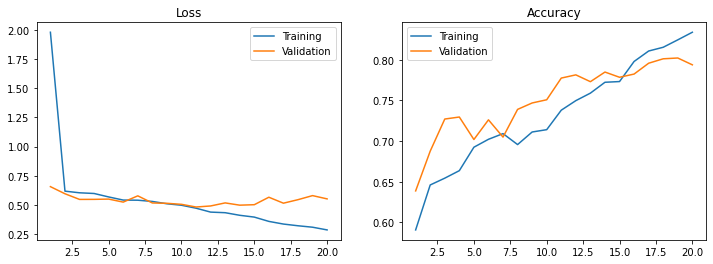

In [11]:
"""
손실함수 그래프를 그려보면 과대적합이 빠르게 발생한 것을 확인
"""
# 손실함수, 정확도 그래프 그리기
plot_loss_acc(history, 20)

In [ ]:
"""
#데이터 증강

ImageDataGenerator를 사용하면 다양한 데이터 증강 기법을 클래스 함수의 매개변수 속성으로
지정할 수 있어서 편리하다는 장점,
다음 코드에서는 좌우 방향으로 뒤집는 horizontal_flip 속성을 지정하고 
회전은 최대 30도로 지정한다
이미지를 반시계 방향으로 밀리도록 변형시키는 shape_range 속성과
이미지를 줌으로 확대하는 zoom_range 속성을 추가

이미지 파일이 저장되어 있는 폴더에서 이미지를 배치 크기 단위로 불러와 데이터 증강 기법을
적용하고 목표 크기에 맞춰서 미니 배치를 구성
이것들을 모아서 반복 이터레이션 객체를 만든다
"""
# 이미지 데이터 제너레이터 정의(Augmentation 적용)
image_gen_aug = ImageDataGenerator(rescale=1/255,
                                  horizontal_flip=True,
                                  rotation_range=30,
                                  shear_range=0.15,
                                  zoom_range=0.3)

# flow_from_directory 함수로 폴더에서 이미지 가져와서 제너레이터 객체로 정리
train_gen_aug = image_gen_aug.flow_from_directory(train_dir,
                                         batch_size=32,
                                         target_size = (224, 224),
                                         classes = ['cats', 'dogs'],
                                         class_mode = "binary",
                                         seed=2020)

valid_gen_aug = image_gen_aug.flow_from_directory(valid_dir,
                                         batch_size=32,
                                         target_size = (224, 224),
                                         classes = ['cats', 'dogs'],
                                         class_mode = "binary",
                                         seed=2020)


#모델 생성
model_aug = build_model()

#모델 컴파일
model_aug.compile(optimizer=tf.optimizers.Adam(lr=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=["accuracy"])

#모델 훈련
history_aug = model_aug.fit(train_gen_aug, validation_data=valid_gen_aug, epochs=40)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/40
251/251 [==============================] - 65s 256ms/step - loss: 1.6106 - accuracy: 0.5552 - val_loss: 0.6834 - val_accuracy: 0.5620
Epoch 2/40
251/251 [==============================] - 65s 258ms/step - loss: 0.6557 - accuracy: 0.5965 - val_loss: 0.6362 - val_accuracy: 0.6362
Epoch 3/40
 27/251 [==>...........................] - ETA: 46s - loss: 0.6452 - accuracy: 0.5752

In [ ]:
"""
손실함수 그래프를 그려보면 과대적합이 거의 발생하지 않는 것을 확인 - 학습 잘됨
"""
# 손실함수, 정확도 그래프 그리기
plot_loss_acc(history_aug, 40)

In [1]:

"""
프로그래밍/파이썬
텐서플로우 버전 및 gpu 사용가능 확인방법
by Oh my Information 2021. 9. 24.
"""
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf


print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.7.0
Keras Version: 2.7.0

Python 3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.4
Scikit-Learn 1.0.1
GPU is available


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12380707290537131141
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5734203392
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 303087040727071505
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:08:00.0, compute capability: 8.6"
 xla_global_id: 416903419]